## 1. Problem Statement

Objectives:
1. The purpose is to show how unsupervised machine learning works with the clustering algorithm.
2. Data selected from data.gov.sg is resale-flat-prices-1990-2021-onward.csv and go through the step- by-step approach, EDA, Analyze & Deliver.
3. Which algorithm or model is best and recommended.
4. What is the best score, etc., essential to the whole project? 
5. What are the outcomes of the analysis?

## 2. Data Collection
In this next step we will read the csv file called `resale-flat-prices-1990-2021-onward` and check its features and metadata how it is distributed.

In [3]:
!pip install MulticoreTSNE

In [4]:
# Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn as sk


In [6]:
raw_data = pd.read_csv('resale-flat-prices-1990-2021-onward.csv')

In [7]:
# Check the data types
print('Key information of the dataset')
print('')
raw_data.info()

# Check the data shape
print('\nNumber of data:',raw_data.shape[0])
print('This dataframe has',raw_data.shape[1],'features.')
print('-'*100)

Key information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870417 entries, 0 to 870416
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                870417 non-null  object 
 1   town                 870417 non-null  object 
 2   flat_type            870417 non-null  object 
 3   block                870417 non-null  object 
 4   street_name          870417 non-null  object 
 5   storey_range         870417 non-null  object 
 6   floor_area_sqm       870417 non-null  float64
 7   flat_model           870417 non-null  object 
 8   lease_commence_date  870417 non-null  int64  
 9   remaining_lease      870417 non-null  object 
 10  resale_price         870417 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 73.0+ MB

Number of data: 870417
This dataframe has 11 features.
---------------------------------------------------------------------------

The table above tells us that we have 870417 rows in our dataframe and  11 columns within a diverse data types (string, float and integers), for the sake of the clustering task we will need to convert all those object and categorical features to a numerical format either integers or float.

In [8]:
# print a sample of the dataset
raw_data.sample(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
839388,2021-03,JURONG EAST,3 ROOM,308,JURONG EAST ST 32,07 TO 09,79.0,Model A,1984,62 years 02 months,320000.0
684918,2013-06,SERANGOON,3 ROOM,305,SERANGOON AVE 2,01 TO 03,60.0,Improved,1985,70 years 06 months,328000.0
739509,2016-08,SERANGOON,4 ROOM,534,SERANGOON NTH AVE 4,04 TO 06,104.0,Model A,1992,74 years 04 months,425000.0
560824,2008-10,SENGKANG,5 ROOM,319C,ANCHORVALE DR,07 TO 09,110.0,Improved,2002,92 years 02 months,377000.0
400813,2003-03,ANG MO KIO,3 ROOM,158,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,75 years 09 months,160000.0


## 3. Data Cleaning & EDA
In this step we will run data cleaning process where we will remove noisy data and duplicated rows as well, and also explore some charts and insights about the categorical features we have as an Exploratory Data Analsyis.

In [9]:
# check the null/na values
raw_data.isnull().sum()[raw_data.isnull().sum() != 0].value_counts()

Series([], dtype: int64)

There are no null values in this dataset.

In [10]:
# remove the duplicates dataframe
raw_data.drop_duplicates(inplace=True)

In [11]:
# reset_index
raw_data.reset_index(drop=True, inplace=True)

In [12]:
# re-check the shape of the dataframe
print('Number of data:', raw_data.shape[0])
print('This dataframe has', raw_data.shape[1],'features.')

Number of data: 868554
This dataframe has 11 features.


As we can see the data was reduced from 870417 to 868554 rows, with over 1863 duplicated entries that could not serve in our analysis and perhaps might bias the exploratory data analysis.

In [13]:
# check the information of the data
raw_data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,868554.000000,868554.000000,8.685540e+05
mean,95.714632,1987.655316,3.045418e+05
std,25.951169,10.001305,1.567918e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1980.000000,1.860000e+05
50%,93.000000,1986.000000,2.850000e+05
75%,113.000000,1995.000000,3.975000e+05
max,307.000000,2019.000000,1.388889e+06


### Insights
- All apartments floor area (square meter) vary between 28 to 307sqm. 
- The mean floor area is 95.71sqm and the median floor area is 95sqm.
- The oldest lease commence date is year 1966 and the most recent is year 2019.
- Resale price vary between 5000.0 SGD to 1388888.88 SGD. The mean resale price is 304541.78 SGD.

### Univariate Plots
I will look into each feature individually by plotting their distribution and see the influence of each feature on the resale price
<br/>
#### Feature: resale_price

C:\Users\kelvin.liew\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kelvin.liew\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


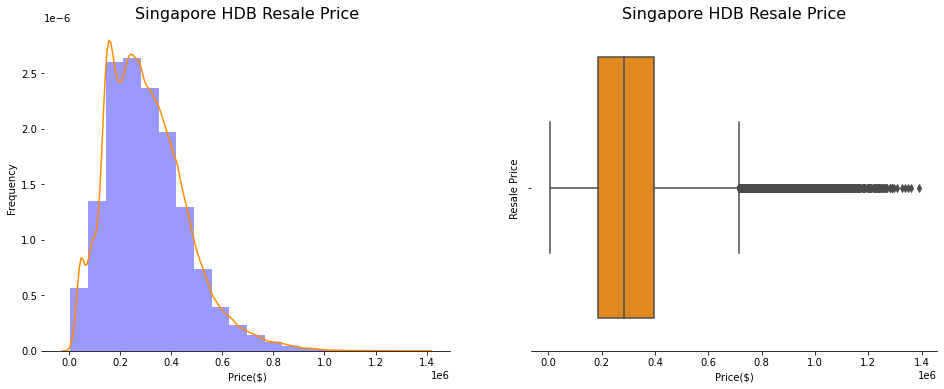

In [14]:
# study the distribution of the 'resale_price' histogram
f, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.despine(left=True)

plt.subplot(121)
sns.distplot(raw_data['resale_price'], axlabel='Price($)', bins=20, 
             color='blue',kde_kws={'color':'darkorange'})
plt.title("Singapore HDB Resale Price", fontsize=16)
plt.ylabel('Frequency')

plt.subplot(122)
sns.boxplot(raw_data['resale_price'], color='darkorange');
plt.title("Singapore HDB Resale Price", fontsize=16)
plt.xlabel('Price($)')
plt.ylabel('Resale Price');  

Observation:

- Majority of the prices are between 200,000 to 800,000 SGD.
- The histogram is not normally distributed and it is right-skewed.
- From the boxplot, we can see that there are numbers of outlier after the maximum whisker which explained the right skewed of the histogram.

#### Feature: floor_area_sqm
Check this feature distribution and correlation with resale price



C:\Users\kelvin.liew\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


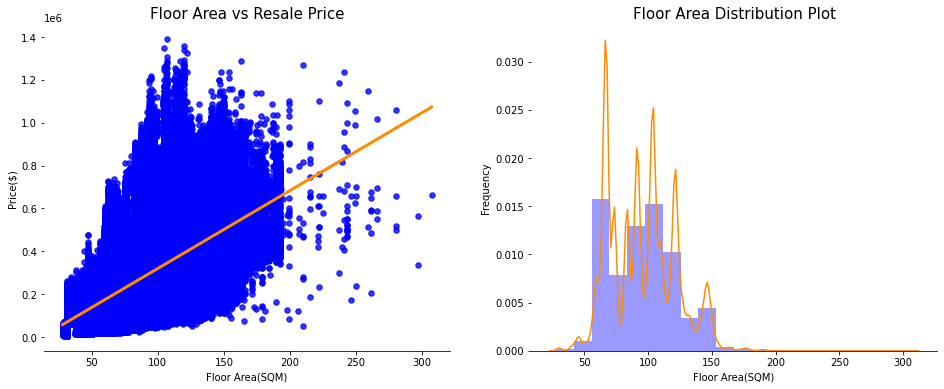

In [15]:
f, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.despine(left=True)

plt.subplot(121)
sns.regplot(data=raw_data, x='floor_area_sqm', y='resale_price', ci=None, 
            scatter_kws={'color':'blue','s':30},
            line_kws={"color":"darkorange","lw":3})
plt.title('Floor Area vs Resale Price', fontsize=15)
plt.xlabel('Floor Area(SQM)')
plt.ylabel('Price($)')

plt.subplot(122)
sns.distplot(raw_data['floor_area_sqm'], axlabel='Floor Area(SQM)', bins=20, 
             color='blue', kde_kws={'color':'darkorange'})
plt.title('Floor Area Distribution Plot', fontsize=15)
plt.ylabel('Frequency');

Observation:

- Floor area increase, the resale price increase.
- Most of the observation between 40 to 200 sqm.
- The HDB resale price seems to be the highest for the floor area between 100 to 125 sqm.
- There are some outliers that should be removed.

#### Feature: Categorical Features
Check these features frequency and correlation with resale price

In [16]:
cat_features =['town', 'flat_type', 'storey_range', 'flat_model']

def cat_plotter(x_fea, y_fea, data):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
    
    sns.countplot(x=x_fea, data=data, ax=ax1, order=data[x_fea].value_counts().index)
    ax1.set_title(f'Histogram of {x_fea}', fontsize = 18)
    ax1.set_xlabel(x_fea, fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
    ax1.set_ylabel('Frequency count', fontsize=16)
    
    sns.boxplot(x=x_fea, y=y_fea, data=raw_data, ax=ax2)
    ax2.set_title(f'Boxplot of {x_fea} vs Resale Price', fontsize = 18)
    ax2.set_xlabel(x_fea, fontsize=15)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
    ax2.set_ylabel('Resale Price', fontsize=16)
        
    fig.tight_layout()
    plt.show()

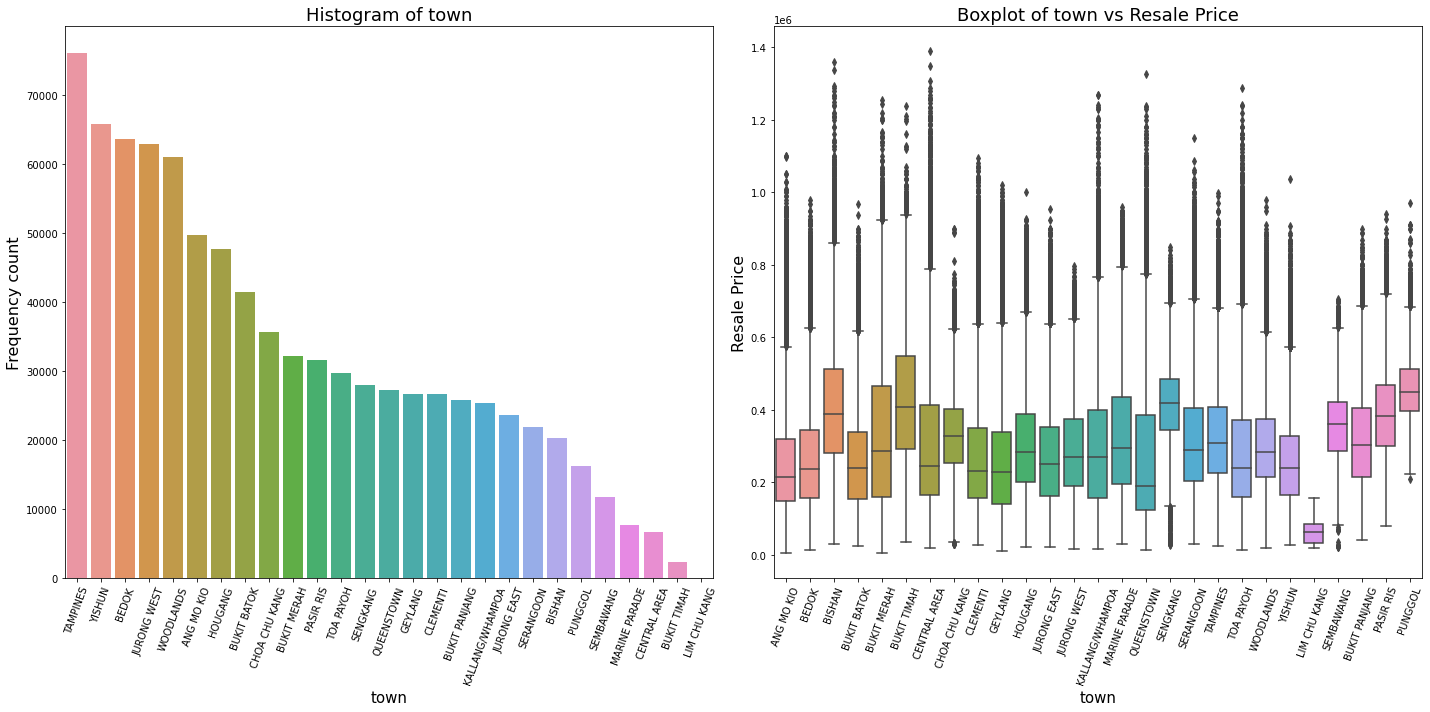

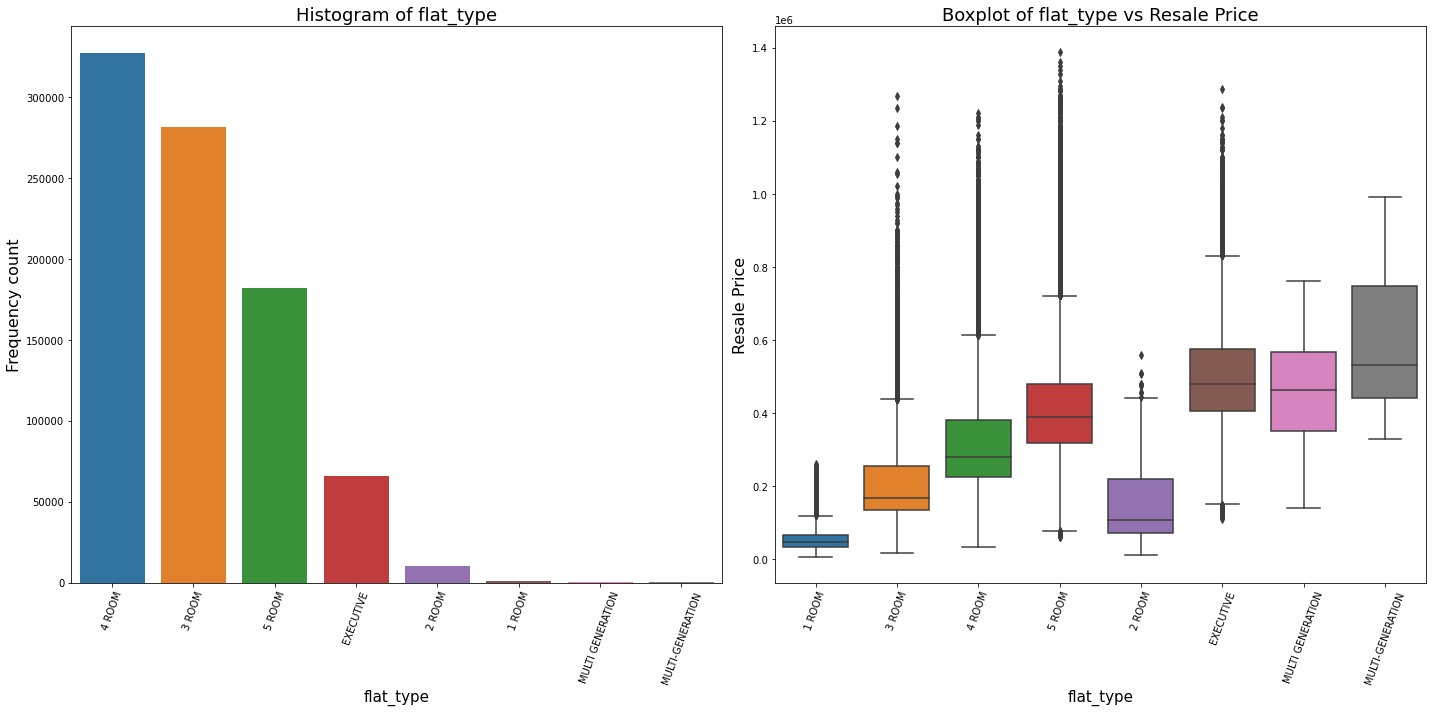

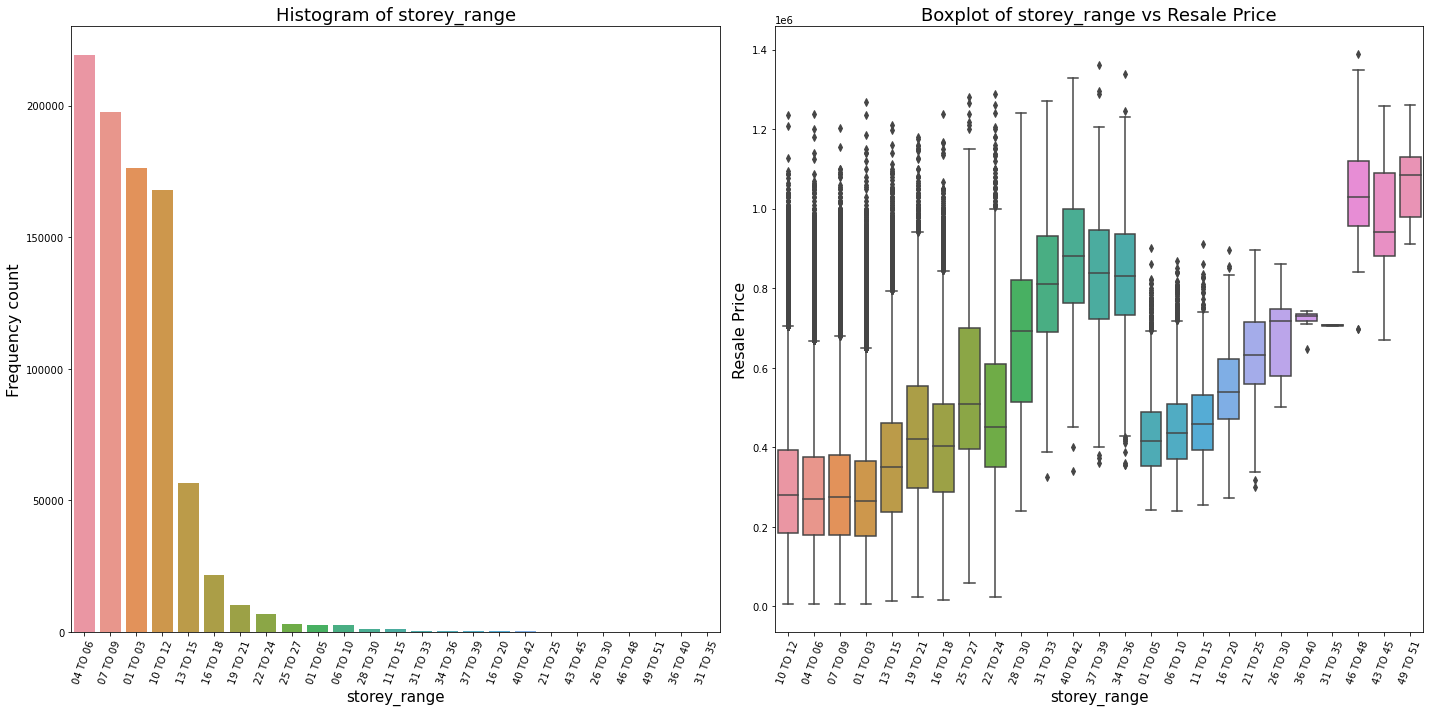

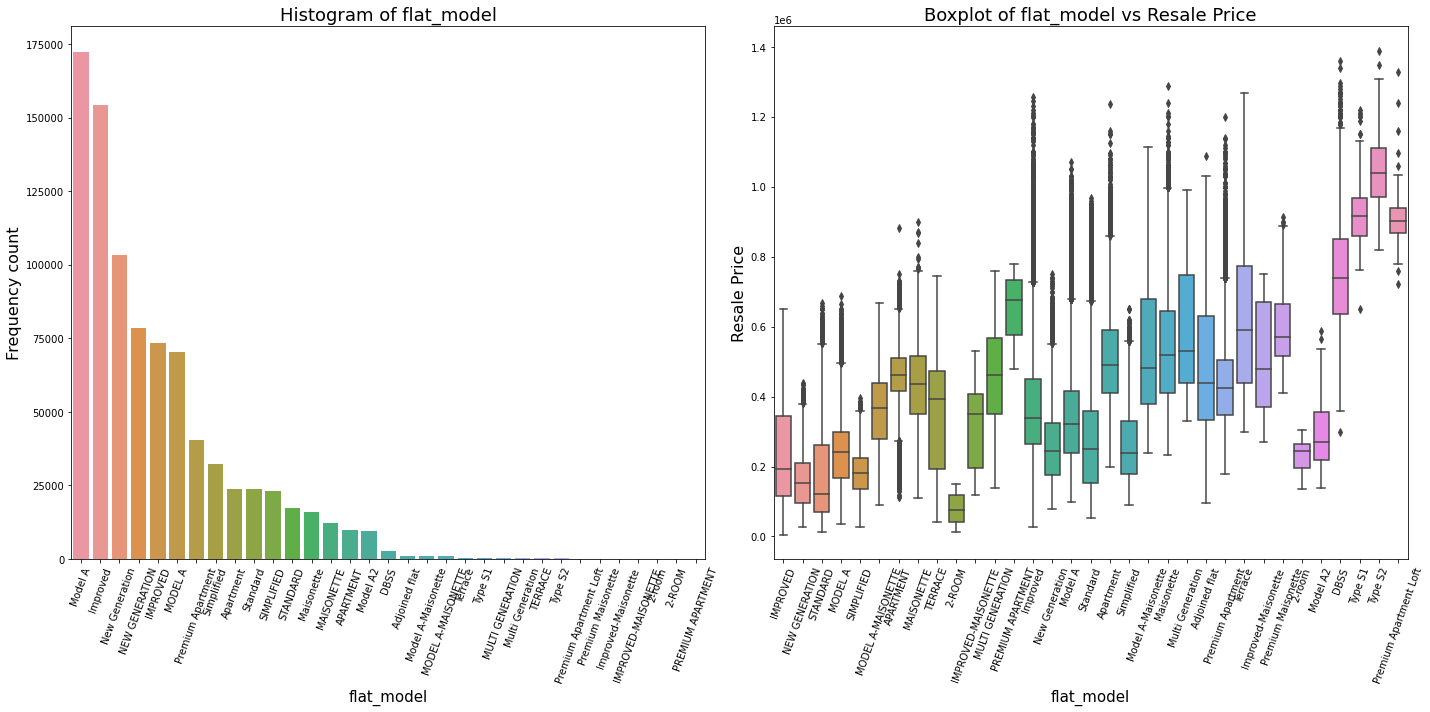

In [17]:
for c in cat_features:
    cat_plotter(c, raw_data['resale_price'], raw_data)

Observation:

**town**

- Sengkang, Woodland and Jurong West have the highest sale occurrences.
- The most expensive HDB area is the central area, Bukit Merah and Bishan.

**flat type**

- There are much fewer 1 Room, 2 Room, Multi-Generation and Executive flats compare to 4 Room HDB flat.
- The most common flat type is 4 Room, 5 Room and 3 Room.

**storey range**

- There is a clear upwards trend in resale price for higher stories.
- Level 04 to level 06 have the highest sale occurrences.

**flat model**

- Model A, Improved and New Generation are the most common HDB model.
- Prices vary widely, which is probably due to some flat model size is smaller, poor design or old flat.

## 4. Preprocessing & Modeling
### Feature Engineering
The aim of this task is to transform the existing features from their categorical format into a numerical format so that it could be feeded into a Machine Learning model for clustering purposes

**Month feature**

I will separate the existing `month` feature in the format of year-month and create 2 new columns for year feature and month feature. and then drop the old one



In [18]:
def extract_year(date):
  return date.split("-")[0]

def extract_month(date):
  return date.split("-")[1]

In [19]:
# make a copy of the dataframe
data = raw_data.copy()

In [20]:
# create a year column
data['year'] = data.month.apply(extract_year)
# update the month column
data['month'] = data.month.apply(extract_month)

In [21]:
data.sample(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
748325,03,TAMPINES,3 ROOM,878,TAMPINES AVE 8,10 TO 12,74.0,Model A,1988,70 years 08 months,328000.0,2017
180947,02,BEDOK,3 ROOM,701,BEDOK RESERVOIR RD,01 TO 03,68.0,NEW GENERATION,1980,80 years 10 months,158000.0,1998
657199,03,SERANGOON,4 ROOM,226,SERANGOON AVE 4,06 TO 10,93.0,New Generation,1984,70 years 09 months,460000.0,2012
160807,06,HOUGANG,4 ROOM,835,HOUGANG CTRL,04 TO 06,109.0,MODEL A,1992,93 years 06 months,365000.0,1997
201215,07,GEYLANG,4 ROOM,315,UBI AVE 1,07 TO 09,104.0,MODEL A,1985,85 years 05 months,272000.0,1998


**storey_range feature**

I will create a new `mean_floor` feature in numerical variable format because it is more predictable compare to the categorical variable.

In [22]:
mean_floor = []

for x in range(0, data.shape[0]):
    mean_floor.append(int((int(data['storey_range'][x][:2]) + int(data['storey_range'][x][-2:]))/2))
    
data['mean_floor'] = mean_floor

In [23]:
data.sample(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,mean_floor
185602,03,GEYLANG,3 ROOM,34,CIRCUIT RD,01 TO 03,60.0,STANDARD,1967,67 years 09 months,125000.0,1998,2
638904,05,JURONG WEST,5 ROOM,839,JURONG WEST ST 81,07 TO 09,126.0,Improved,1993,80 years 07 months,398000.0,2011,8
233491,01,YISHUN,5 ROOM,776,YISHUN AVE 2,10 TO 12,121.0,IMPROVED,1986,85 years 11 months,320000.0,1999,11
709242,02,JURONG WEST,4 ROOM,679C,JURONG WEST CTRL 1,10 TO 12,94.0,Premium Apartment,2000,83 years 10 months,439388.0,2015,11
29808,05,BUKIT BATOK,3 ROOM,182,BT BATOK WEST AVE 8,04 TO 06,67.0,NEW GENERATION,1984,90 years 07 months,38000.0,1992,5


In [24]:
# now that the calculation is done we can drop the column having the categorical values of storey_range	
data.drop('storey_range', axis=1, inplace=True)

**remaining_lease**

I will retrieve the remaining year data from `remaining_lease` feature in numerical variable format that will be useful for the prediction.

In [25]:
data['remaining_year'] = data['remaining_lease'].str.split(' years').str[0].astype(int)

In [26]:
# drop the old column and check the new dataframe structure
data.drop('remaining_lease', axis=1, inplace=True)
data.sample(5)

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mean_floor,remaining_year
258338,06,GEYLANG,4 ROOM,5,HAIG RD,92.0,NEW GENERATION,1976,253000.0,1999,2,75
116700,02,YISHUN,3 ROOM,862,YISHUN AVE 4,74.0,MODEL A,1988,150000.0,1996,11,90
90463,04,PASIR RIS,4 ROOM,411,PASIR RIS DR 6,113.0,MODEL A,1990,235000.0,1995,8,93
688720,10,KALLANG/WHAMPOA,3 ROOM,93,WHAMPOA DR,65.0,Improved,1974,331000.0,2013,2,59
57520,12,YISHUN,3 ROOM,131,YISHUN ST 11,74.0,MODEL A,1985,95000.0,1993,11,90


We can see that our dataframe still have some categorical values like `flat_type`, `street_name`, `town` and `flat_model` that we need to transform into numerical values so we can proceed to the Data Modeling step. 

In [27]:
data.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mean_floor,remaining_year
0,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,1990,11,85
1,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,1990,5,85
2,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,1990,11,85
3,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,1990,8,85
4,01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,46000.0,1990,2,85


**flat_type**


In [28]:
data.flat_type.value_counts()

4 ROOM              327229
3 ROOM              281255
5 ROOM              181849
EXECUTIVE            66026
2 ROOM               10411
1 ROOM                1255
MULTI GENERATION       279
MULTI-GENERATION       250
Name: flat_type, dtype: int64

In this step we will explore the `flat_type` distribution and see how we can map it to numerical values, and as we can see there are 8 categorical values.

In [29]:
# convert the data type to categorical
data.flat_type = pd.Categorical(data.flat_type)
data['flat_type'] = data.flat_type.cat.codes

In [30]:
data.sample(5)

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mean_floor,remaining_year
552922,07,WOODLANDS,2,17,MARSILING LANE,65.0,Improved,1984,193000.0,2008,14,74
517199,04,ANG MO KIO,2,443,ANG MO KIO AVE 10,67.0,New Generation,1979,159000.0,2007,5,70
146385,01,BEDOK,2,125,BEDOK NTH RD,82.0,NEW GENERATION,1978,259000.0,1997,11,79
399359,02,TOA PAYOH,3,80B,LOR 4 TOA PAYOH,104.0,Model A,1997,384000.0,2003,8,92
348230,09,TAMPINES,2,271,TAMPINES ST 21,75.0,Model A,1984,181000.0,2001,5,81


Within the same way we transform `flat_model` feature as well

In [31]:
# convert the data type to categorical
data.flat_model = pd.Categorical(data.flat_model)
data['flat_model'] = data.flat_model.cat.codes

Now that we only have 3 categorical columns, let's see their distribution and check if we can convert them to numerical ones or we will be supposed to drop them out.

In [32]:
print(f'The length of unique values in town columns is {len(data.town.value_counts())} ')
print(f'The length of unique values in street_name columns is {len(data.street_name.value_counts())} ')
print(f'The length of unique values in block columns is {len(data.block.value_counts())} ')

The length of unique values in town columns is 27 
The length of unique values in street_name columns is 577 
The length of unique values in block columns is 2581 


As we can see their cardinality is so high, so it's better to drop them at the moment.

In [33]:
# drop categorical features
data.drop(['town', 'street_name', 'block'], axis=1, inplace=True)

In [34]:
data.sample(5)

,month,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mean_floor,remaining_year
251342,05,3,105.0,11,1992,320000.0,1999,2,91
812295,03,4,123.0,28,1977,550000.0,2020,14,56
186784,03,3,93.0,19,1984,294000.0,1998,11,84
51688,10,4,127.0,6,1980,243000.0,1993,5,85
842857,05,4,113.0,22,2015,600000.0,2021,8,93


### Data Modeling - Clustering
Before we move towards the clustering stage of our dataset with K-means, we can clearly notice that our dataframe needs to be normalized first since we changed the scale of `flat_type` feature. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [35]:
data_arr = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_arr)
scaled_data = pd.DataFrame(x_scaled, columns=data.columns)

In [36]:
# check our dataframe after normalization
scaled_data.sample(5)

,month,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mean_floor,remaining_year
164785,0.545455,0.285714,0.139785,0.18750,0.094340,0.126455,0.21875,0.1250,0.508772
42217,0.181818,0.428571,0.254480,0.59375,0.396226,0.091770,0.09375,0.0000,0.859649
310321,0.727273,0.571429,0.347670,0.25000,0.509434,0.223139,0.31250,0.2500,0.842105
298912,0.363636,0.571429,0.344086,0.25000,0.566038,0.220393,0.31250,0.1250,0.894737
813792,0.181818,0.428571,0.193548,0.25000,0.169811,0.233400,0.93750,0.3125,0.192982


### K-means clustering
Since K-means is an unsupervised machine learning approach, the most important question that we will need to figure out is **How many clusters we will divide our data into**, actually there is no hard science method that answers directly this question. The most used approach is to set an interval of `k clusters` and then we start applying the k-means algorithm to check where the `inertia`value will get stabilized and stop decreasing, this is also called the `Elbow line`

In [37]:
from sklearn.cluster import KMeans

In [38]:
# Elbow criterion to determine optimal number of clusters
def draw_elbow_plot(data, maxK=10):  
    """
    This function transform a given categorical columns in dataframe to a one hot represntation
    
    Parameters:
    data (dataframe) : data to be fitted
    maxK (int) : maximum number of clusters with which to run k-means
    """
    
    # initialise an empty dictionary that will hold our sum squared error
    sse = {}
    for k in range(1, maxK):
        kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
        
    plt.figure(figsize=(17, 8))
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("Sum Squared Error")
    plt.title("Elbow graph")
    plt.show()

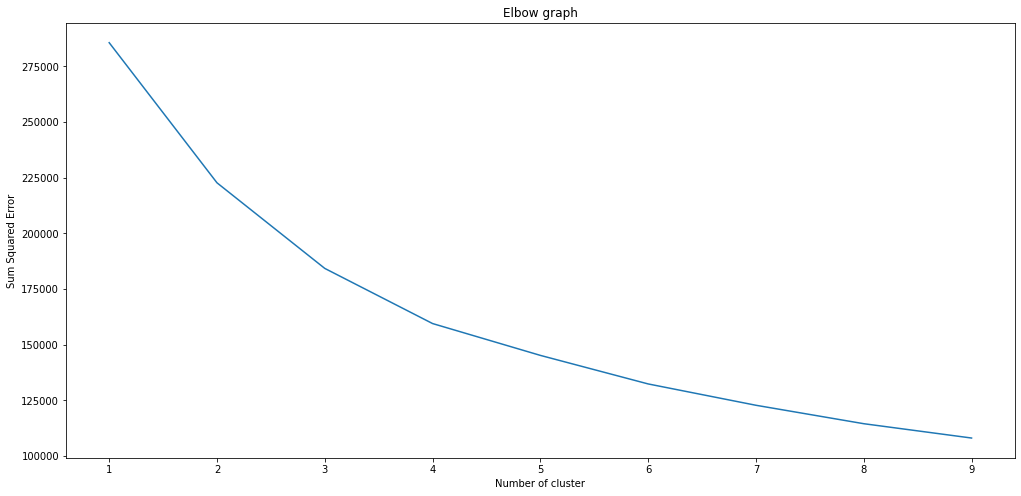

In [ ]:
# apply the built in method and plot result
draw_elbow_plot(scaled_data, maxK=10)

Based on the elbow graph above, we can conclude that the the best value of `k` will be 4, since after that the line didn't decrease too much.

The next step will be training the kmeans algorithm with the found value of K and visualize results in a 2 dimensional space using T-SNE.

### Training K-means k = 4

In [39]:
# fitting the data into clusters using K-means
kmeans = KMeans(n_clusters=4)
clustering_scal = kmeans.fit_predict(scaled_data)

In [40]:
# affect clusters to their own entries
scaled_data["cluster"] = clustering_scal

<AxesSubplot:xlabel='cluster', ylabel='count'>

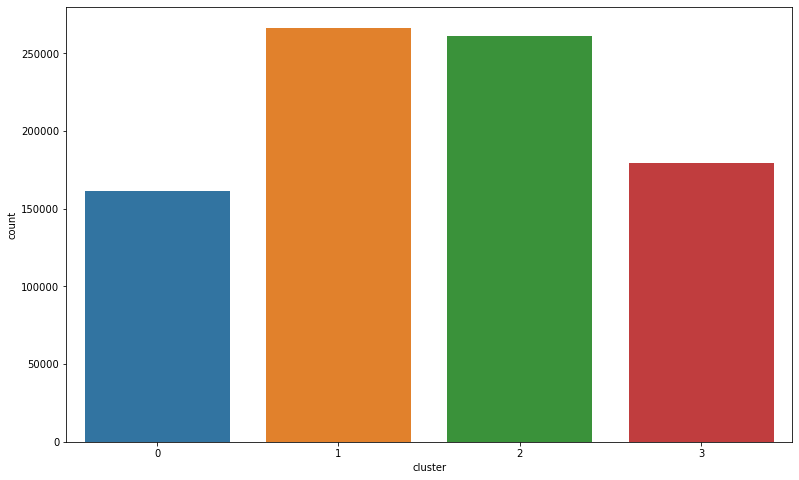

In [41]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 8
sns.countplot(x="cluster", data=scaled_data)

## Clusters visualization over a sample with T-SNE
In this step we will train a T-SNE model over a sample of our dataset just to make it faster to train, since it is very time consuming and won't change too much insights on a sample of the original data.

In [42]:
# Initialize t-SNE model on the dataframe X_pca to further reduce dimensions to 2
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(perplexity=50, n_jobs=-1)

In [43]:
# Reduce dimensions
sampled_scaled_data = scaled_data.groupby('cluster').apply(lambda x: x.sample(n=5000)).reset_index(drop = True)
X_tsne_features = tsne.fit_transform(sampled_scaled_data)

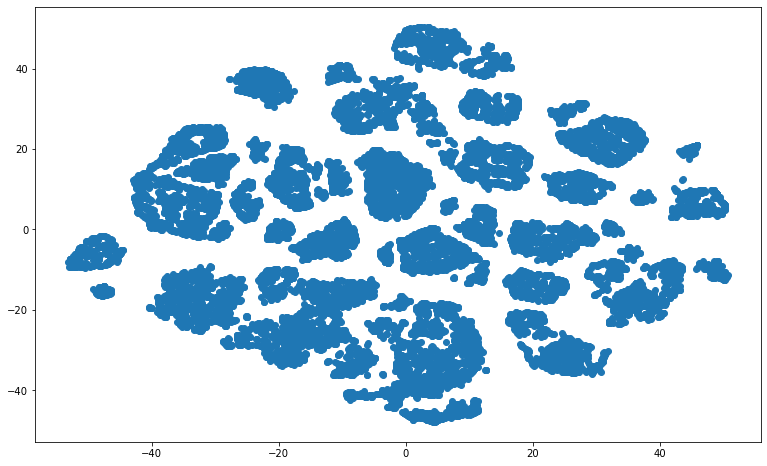

In [44]:
# Prepare to plot the dataset
plt.scatter(X_tsne_features[:, 0], X_tsne_features[:,1])
plt.show()

This is how our data looks at the two dimensional space created by T-SNE model and as we can see, it's hard a bit to differntiate between clusters, that's why we will call the labels provided by K-means algorithm and give them more colorful annotations so it makes it easier to interpret clusters between each others.

In [45]:
kmeans = KMeans(n_clusters=4)
clustering_scal = kmeans.fit_predict(sampled_scaled_data)

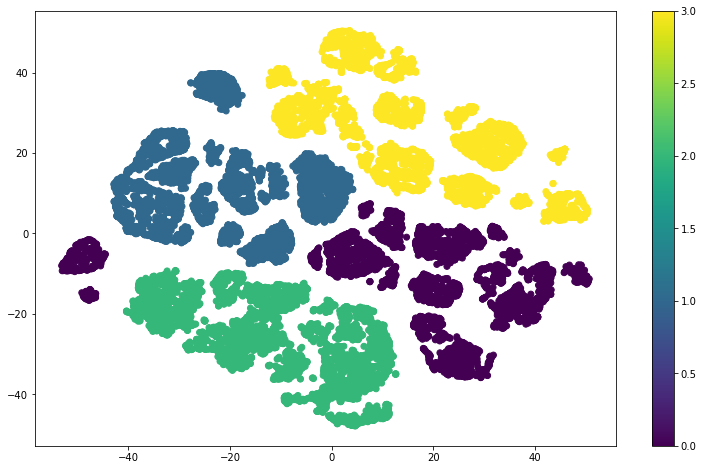

In [46]:
plt.scatter(X_tsne_features[:, 0], X_tsne_features[:,1], c = kmeans.labels_ )
plt.colorbar()
plt.show()

## 5. Evaluation and Conceptual Understanding

In [47]:
# Calculate silhouette_score
print(sk.metrics.silhouette_score(sampled_scaled_data, kmeans.labels_))

0.5516605736910506


So as we can see from the plot above, the k-means algorithm has done w good job by finding hidden patterns in our normalized dataset, the clusters are well splitted with some small collisions. Also the silouette score with 0.55 indicates that our model performed very well on differentiating between data points and that's just on a sample, not all of the dataset.


### DBSCAN clustering algorithm

DBSCAN is a clustering algorithm and is part of the class of Unsupervised Learning algorithms. It allows us to select groups from datasets based on shared characteristics for samples within a particular group.

#### Pre-requisite Concepts for DBSCAN
- Epsilon Value (eps)
- Minimum Points minPts
- Types of Points in DBSCAN Clustering

In [48]:
from sklearn.cluster import DBSCAN

Text(0, 0.5, 'Distance')

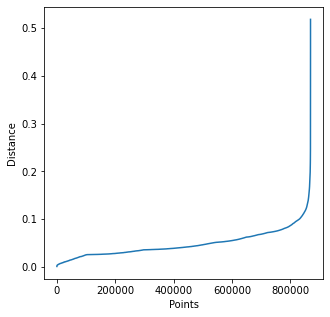

In [49]:
# Finding the Optimal value of Epsilon
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(scaled_data)

distances, indices = neighbors.kneighbors(scaled_data)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

**Identifying Elbow Point with Kneed Package **

To determine the location of maximum curvature visually can be difficult. Hence, a Python package called kneed can be used to detect the knee or elbow point. This can be installed with `pip install kneed`

In [50]:
!pip install kneed

0.07763727003702635


<Figure size 360x360 with 0 Axes>

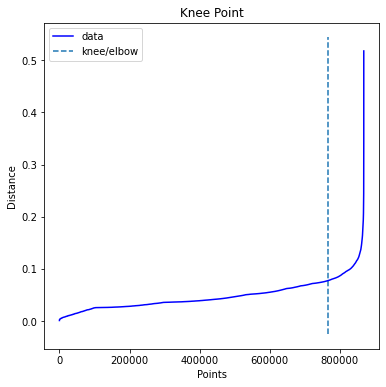

In [51]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

#### Applying DBSCAN with Optimal value of Epsilon = 0.0776
Now that we have derived the optimal value of epsilon as 0.0776 above, let us use this in the DBSCAN algorithm below.

This time it is quite evident that the DBSCAN clustering is done properly with 4 resulting clusters and only few noise points. 

In [52]:
dbscan_cluster = DBSCAN(eps=0.0776, min_samples=8)
dbscan_cluster.fit(sampled_scaled_data)

DBSCAN(eps=0.0776, min_samples=8)

Text(0, 0.5, '$x_2$')

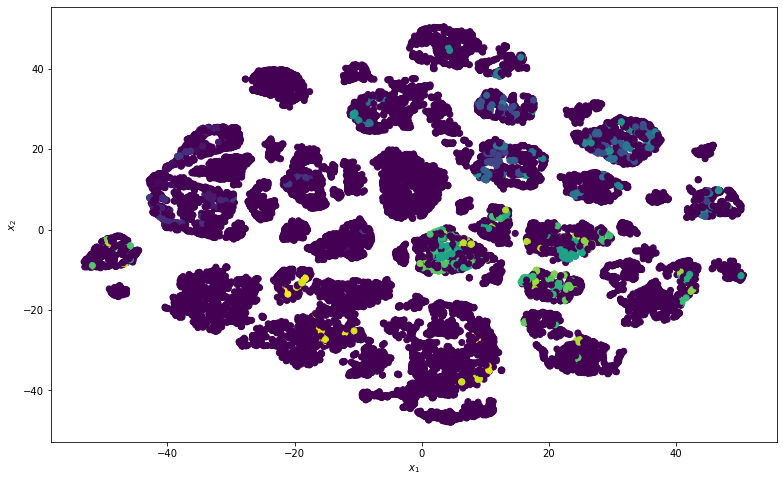

In [53]:
plt.scatter(X_tsne_features[:, 0], X_tsne_features[:, 1],  c=dbscan_cluster.labels_)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [54]:
# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 171


In [55]:
# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 17396


## 5. Evaluation and Conceptual Understanding

As we can see, the DBSCAN algorithm didn't perform better for data clustering and from the plot above we can clearly see how the data stayed in it's noisy format and the `DBSCAN` model couldn't find patterns in the dataset.

By looking at the size of the given sample and the number of points that still represents a noise, we can conclude that the DBSCAN algorithm still need further hyperparameters tuning to make it fit better.


## 6. Conclusion and Recommendations

To conclude with, we can say that our clustring process was very successful with the K-means, looking back to it results and how's the data visualisation helped us to gain isights about the unsupervised clustering model. On the other hand, the DBSCAN algorithm didn't perform very well and the proportion of noise points that were achieved is very big, this due to the nature of the algorithm is very difficult to tune and depends on many hyper-parameters that correlate between each others.

To improve results, we can recommend the following steps in the future:
- Transform locations categorical data into Geolocations coordinates (latitude & longitude)
- Try Principal Component Analysis to reduce the dimensionality of our dataset
- Hyper-parameters tuning for DBSCAN model.
- Try different other clustering algorithms.